### LOS Prediction

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)

# To build models for prediction

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To check the model performance

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [3]:
# load dataset
data = pd.read_csv(r"C:\Users\USER\Downloads\healthcare_data.csv")

In [4]:
# copy data to another variable
same_data = data.copy()

### Data Overview

In [6]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [7]:
data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

Available Extra Rooms in Hospital, staff_available, patientid, Visitors with Patient, Admission_Deposit, Stay (in days) are numerical data types (int64,float64) while the other variables are categorical (object) data types

In [10]:
data.shape

(500000, 15)

In [11]:
data.duplicated().sum()

0

There are no duplicated rows in the dataframe.

In [13]:
data["patientid"].value_counts()

patientid
126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: count, Length: 126399, dtype: int64

In [14]:
data["health_conditions"].value_counts()

health_conditions
Other                  94411
High Blood Pressure    79402
Diabetes               73644
Asthama                65514
Heart disease          35141
Name: count, dtype: int64

In [15]:
data.isnull().sum()*100/len (data)

Available Extra Rooms in Hospital     0.0000
Department                            0.0000
Ward_Facility_Code                    0.0000
doctor_name                           0.0000
staff_available                       0.0000
patientid                             0.0000
Age                                   0.0000
gender                                0.0000
Type of Admission                     0.0000
Severity of Illness                   0.0000
health_conditions                    30.3776
Visitors with Patient                 0.0000
Insurance                             0.0000
Admission_Deposit                     0.0000
Stay (in days)                        0.0000
dtype: float64

### Exploratory Data Analysis


### Univariate Analysis

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [19]:
# List all important categorical variables
cat_col = ["Department", "Ward_Facility_Code", "doctor_name", "Age", "gender", "Type of Admission",
            "Severity of Illness", "health_conditions", "Insurance"] 
# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    
    print(data[column].value_counts(1))
    
    print("-" * 50)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Ward_Facility_Code
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: proportion, dtype: float64
--------------------------------------------------
doctor_name
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: proportion, dtype: float64
--------------------------------------------------
Age
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: proportion, dtype: float64
------------------------------------------

### Observations
The majority of the patients in the hospital are admitted for either moderate or minor illnesses, 82%, which are usually more common than extreme illness.

The gynaecology department gets the highest number of patients in the hospital, 68%, while the surgery department has the least number of patients, 1%.

Wards A and C have the lowest proportions of admitted patients, 11%. We will see if these wards are reserved for patients with extreme illnesses or surgical cases, and if patients in these wards have the longest length of stay.

The majority of the patients, 75%, are in the age group, 21-50 and a majority of the patients are females.




In [21]:
def plot_hist_and_box(data, column, bins=30):
    """
    Plots a histogram and boxplot for a given column on the same x-axis scale.
    
    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
        column (str): The name of the numerical column to plot.
        bins (int): Number of bins for the histogram (default is 30).
    """
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    # Create a grid with 2 rows: one for histogram, one for boxplot
    # Share the x-axis so they align
    gs = plt.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.4)
    
    # Histogram
    ax0 = plt.subplot(gs[0])
    sns.histplot(data[column], bins=bins, kde=True, ax=ax0, color='skyblue')
    ax0.set_title(f'Histogram of {column}')
    
    # Boxplot
    ax1 = plt.subplot(gs[1], sharex=ax0)
    sns.boxplot(data[column], ax=ax1, color='lightgreen', orient='h')
    ax1.set_title(f'Boxplot of {column}')
    ax1.set_xlabel(column)

    plt.tight_layout()
    plt.show()

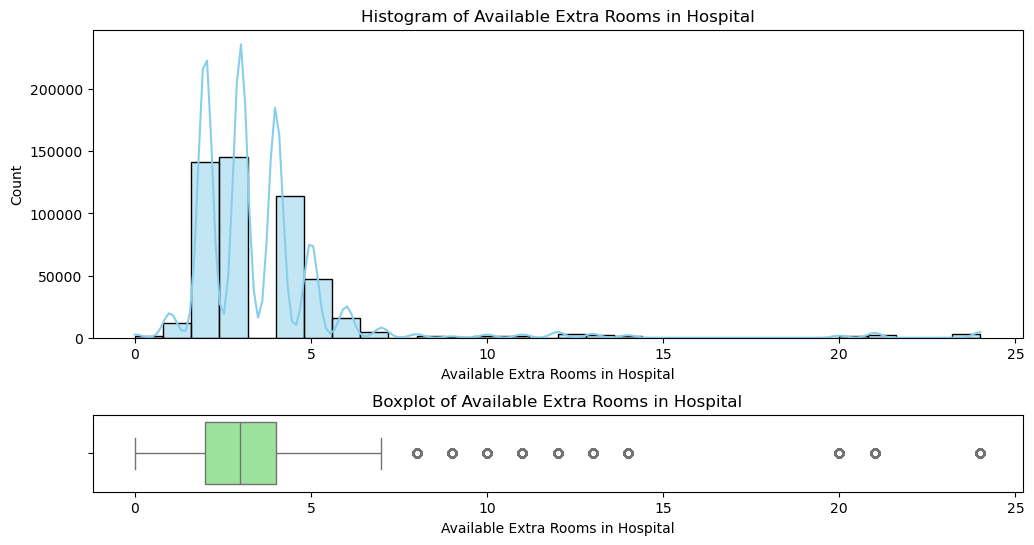

In [22]:
plot_hist_and_box(data, "Available Extra Rooms in Hospital")

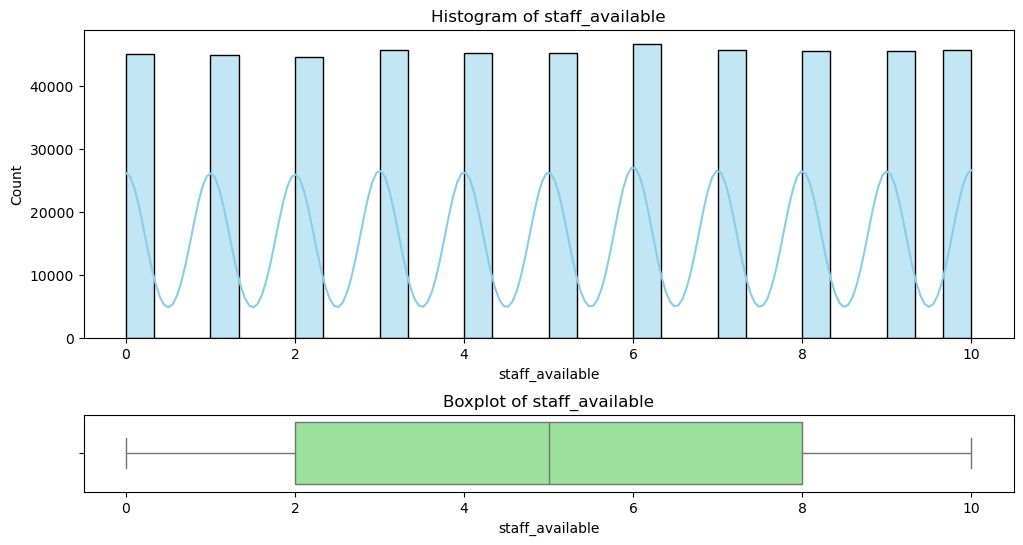

In [23]:
plot_hist_and_box(data, "staff_available")

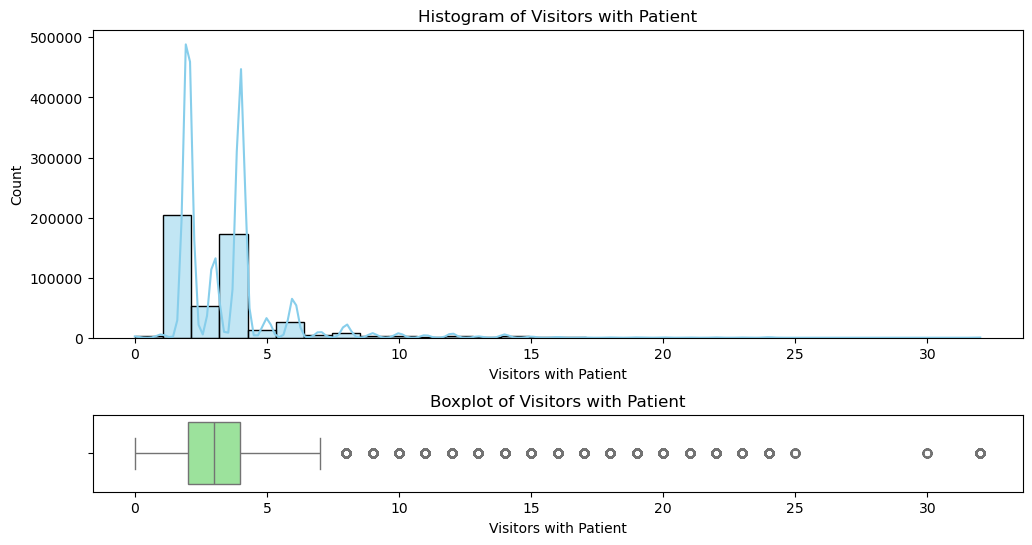

In [24]:
plot_hist_and_box(data, "Visitors with Patient")

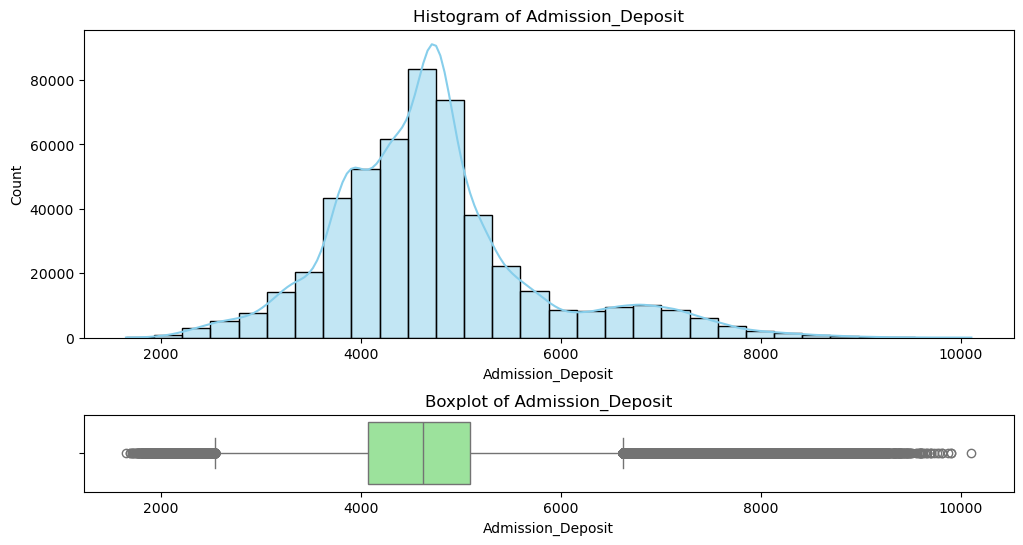

In [25]:
plot_hist_and_box(data, "Admission_Deposit")

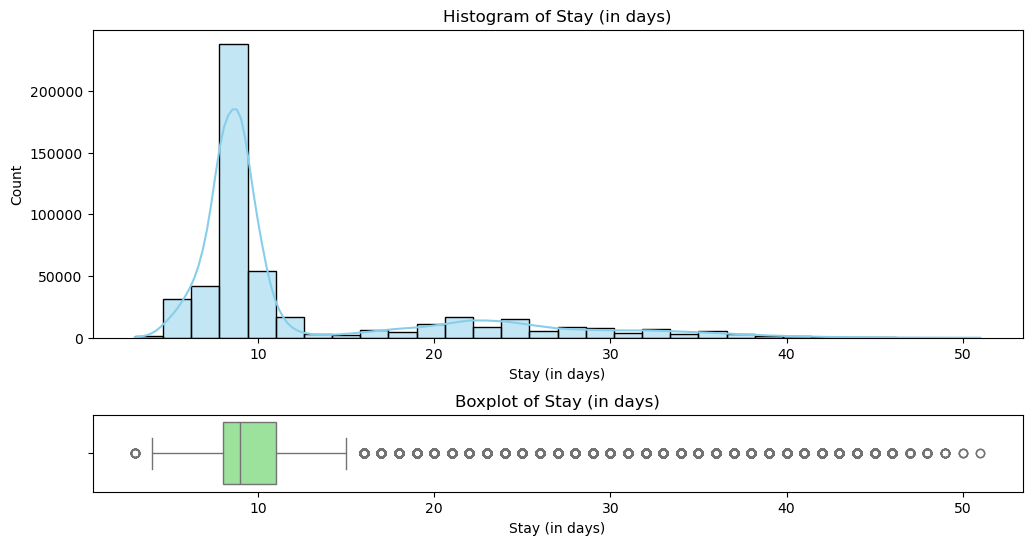

In [26]:
plot_hist_and_box(data, "Stay (in days)")

### Bivariate Analysis

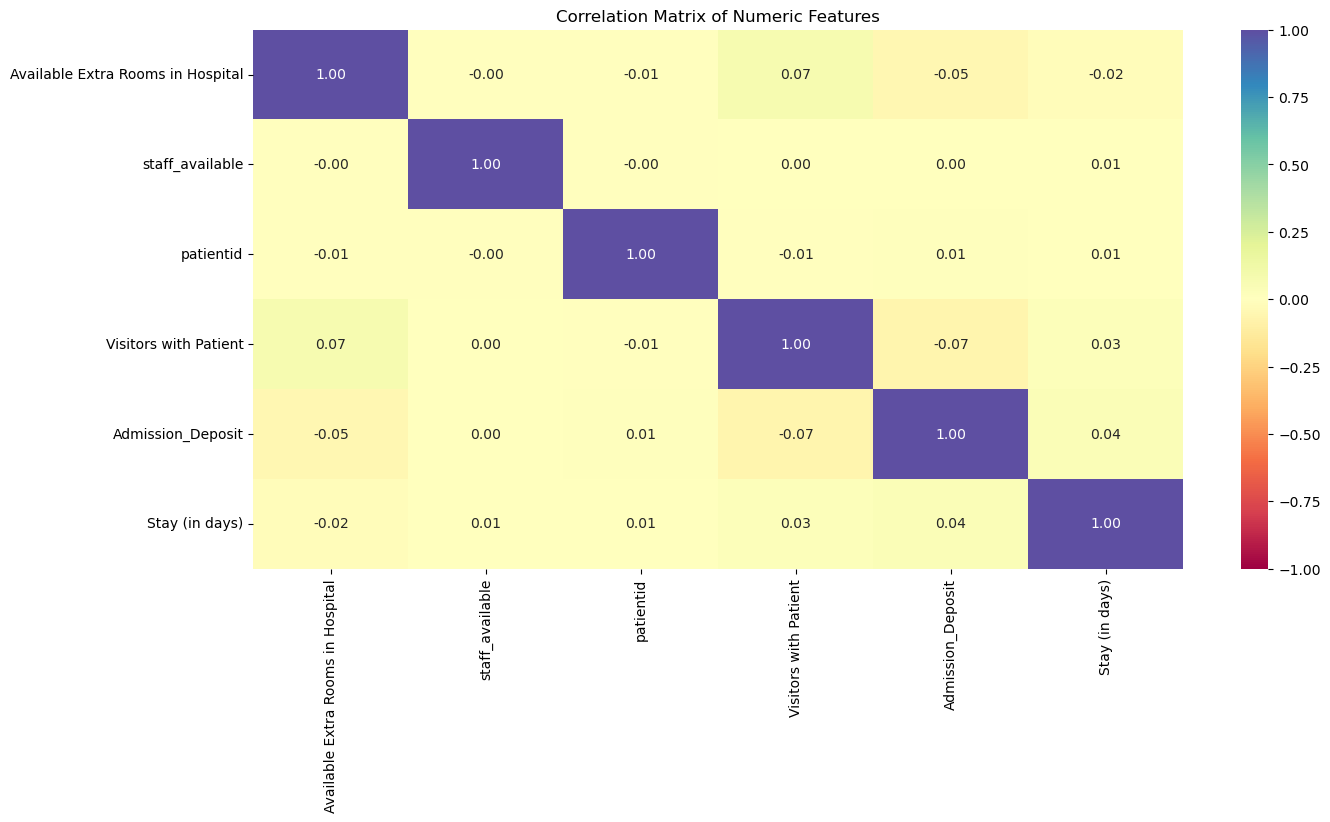

In [28]:
# finding the correlation between columns of the dataset

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

There are no correlations between the numerical variables, and they show no correlation with the target variable, stay (in  days).
The categorical features may be more important for the predictions.

<Figure size 1200x600 with 0 Axes>

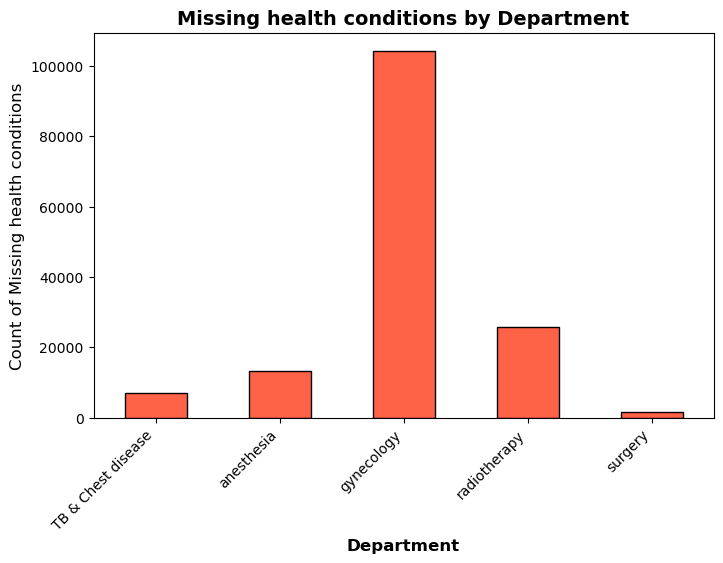

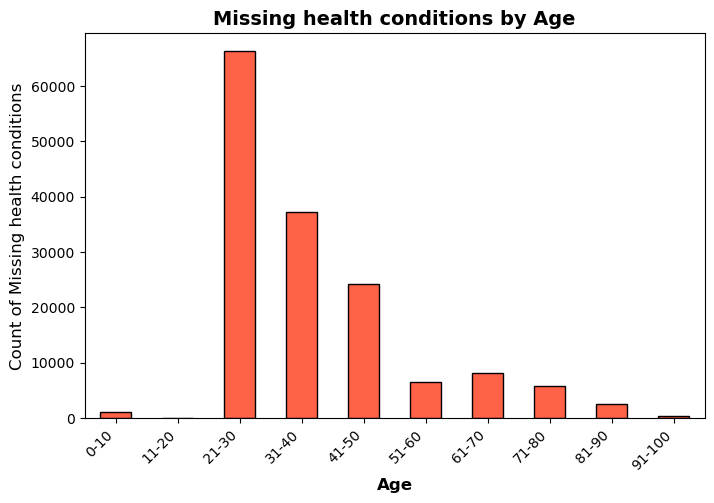

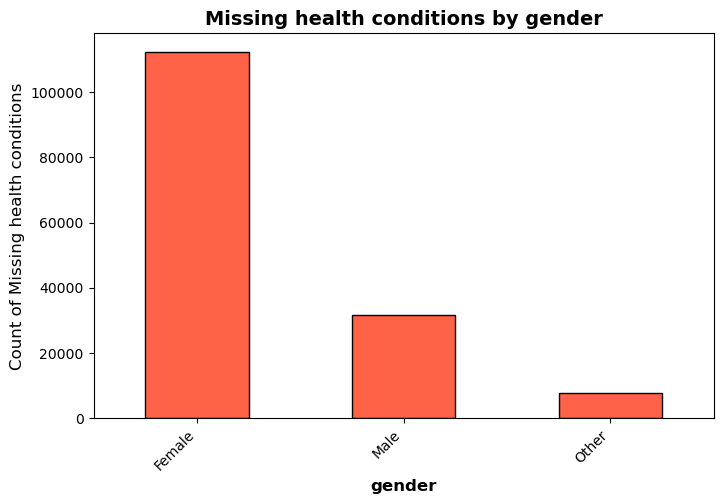

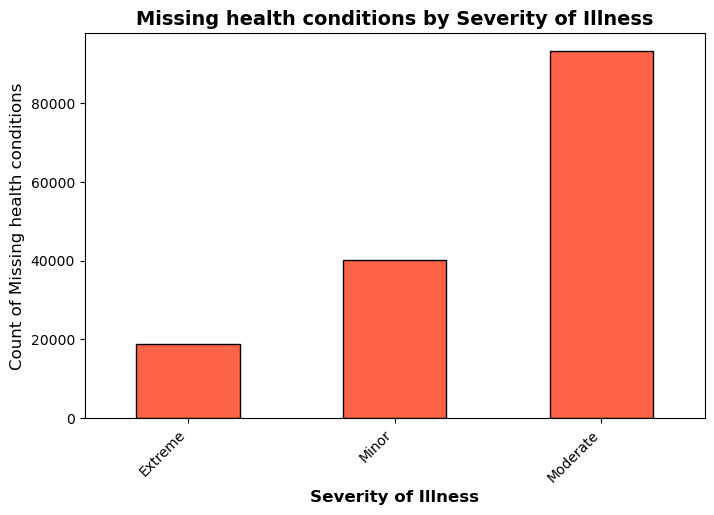

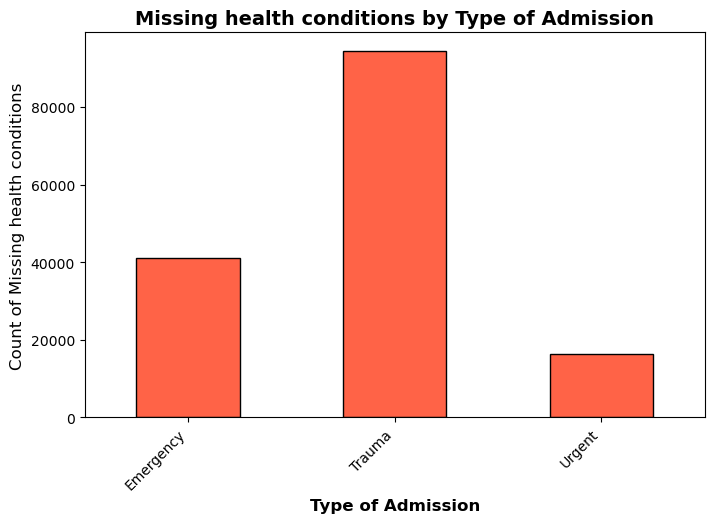

In [30]:
# dealing with missing values in health_conditions
# assess for patterns of missingness, if health_conditions are more 
#likely to be missing for specific groups

# Categories to group by
grouping_categories = ['Department', 'Age', 'gender', 'Severity of Illness',
                     'Type of Admission']

# Plot settings
plt.figure(figsize=(12, 6))

# Loop through each category for grouped plots
for category in grouping_categories:
    missing_counts = data.groupby(category)['health_conditions'].apply(lambda x: x.isna().sum())

    # Create bar plot for missing values
    plt.figure(figsize=(8, 5))
    missing_counts.plot(kind='bar', color='tomato', edgecolor='black')
    plt.xlabel(category, fontsize=12, fontweight='bold')  # Set dynamic x-label
    plt.ylabel("Count of Missing health conditions", fontsize=12)
    plt.title(f"Missing health conditions by {category}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha="right")  # Adjust label rotation for clarity
    plt.show()



The bar plots show that the missing health conditions are mostly occurring with the most prevalent subcategories in each group. This means the missingness is not associated with any particular group and occurs randomly. Since health conditions are medically significant and the missing values make up 30%, a considerable proportion of the health conditions, it will not be imputed with any other condition to avoid creating bias; rather, a new group called 'unknown' will be created for the missing values.

In [32]:
# replace missing values with a new value,'unknown'
data['health_conditions'] = data['health_conditions'].fillna('unknown')
print(data['health_conditions'].value_counts(1))

health_conditions
unknown                0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: proportion, dtype: float64


We will explore the categorical variables to find relationships between them and later between the categorical features and the target variable

In [34]:
data.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

We will check the association between 'Ward_Facility_Code, 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', and target variable, stay (in days)

### Distribution of Numerical Target by Category

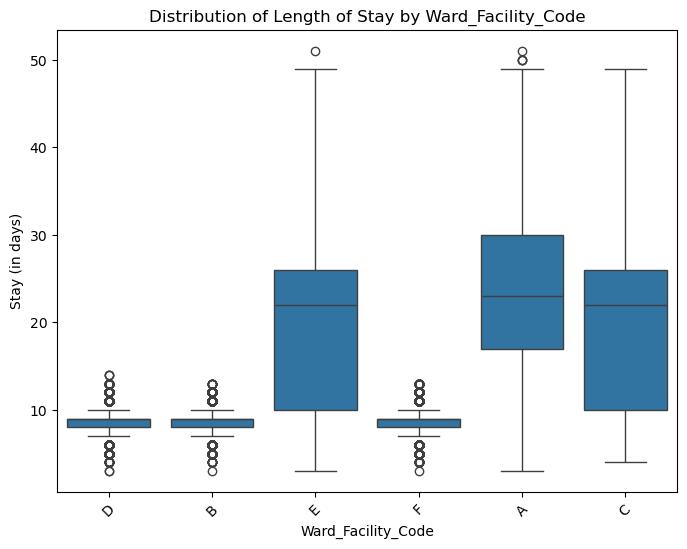

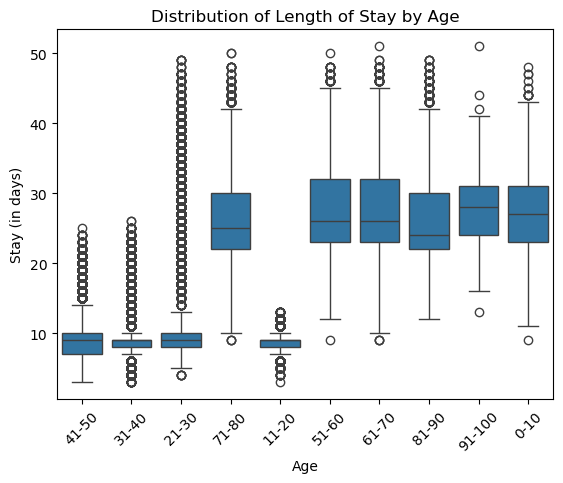

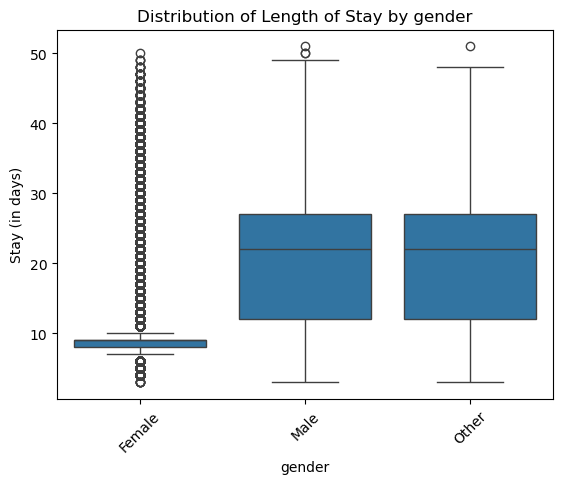

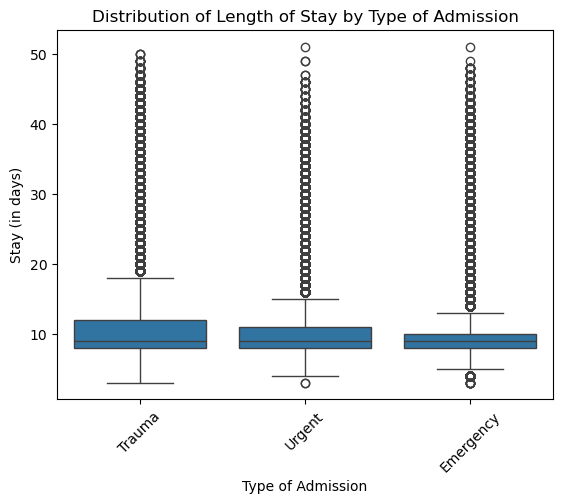

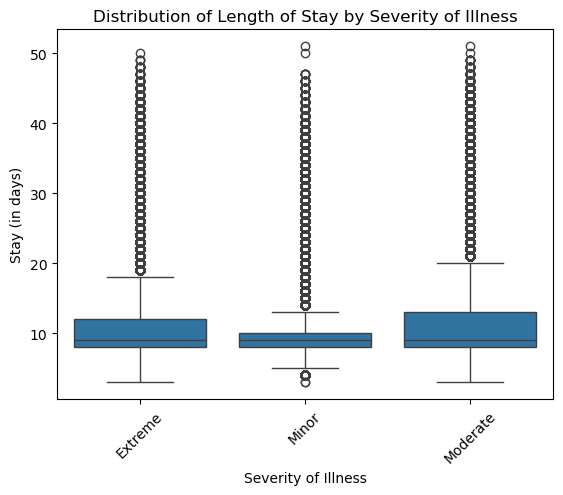

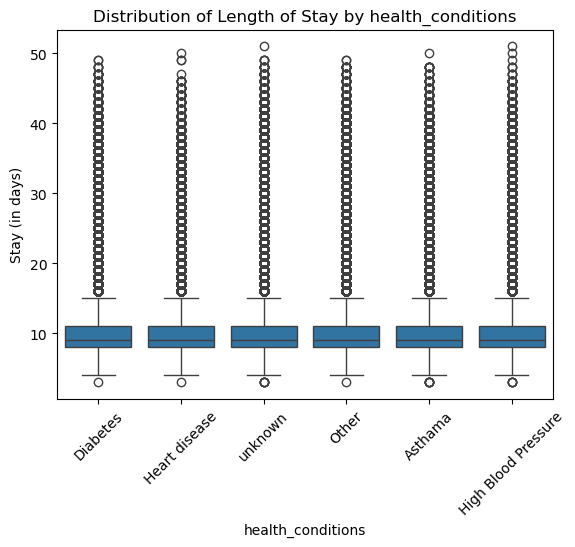

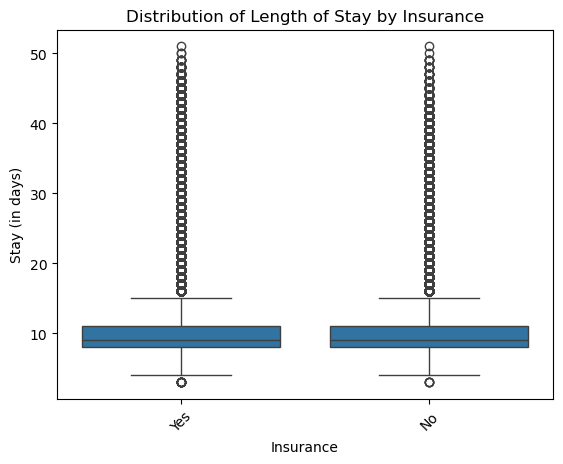

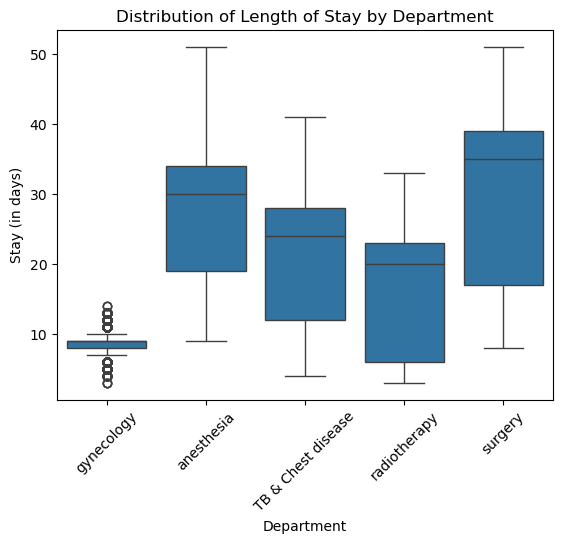

In [37]:
# Loop to plot distribution of numerical target by category
# plot boxplots by looping through category 

categorical_cols = ['Ward_Facility_Code', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 
                    'health_conditions', 'Insurance', 'Department']

# plot settings
plt.figure(figsize=(8, 6))

for category in categorical_cols:
    sns.boxplot(x=data[category], y=data['Stay (in days)'])
    plt.title(f"Distribution of Length of Stay by {category}")
    plt.xlabel(category)
    plt.ylabel("Stay (in days)")
    plt.xticks(rotation=45)
    plt.show()  




### Observations

Patients in 



In [39]:
# Compute mean, median stay per category
# loop through category to compute mean, median stay
categorical_cols = ['Ward_Facility_Code', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 
                    'health_conditions', 'Insurance', 'Department']
for category in categorical_cols:
    summary_stats = data.groupby(category)['Stay (in days)'].agg(['mean', 'median'])
    print(summary_stats)
    print("-" * 50)
    

                         mean  median
Ward_Facility_Code                   
A                   22.529033    23.0
B                    8.660365     9.0
C                   20.202576    22.0
D                    8.645399     9.0
E                   19.718351    22.0
F                    8.605643     9.0
--------------------------------------------------
             mean  median
Age                      
0-10    27.250891    27.0
11-20    8.687876     9.0
21-30   10.716809     9.0
31-40    8.936831     9.0
41-50    9.041576     9.0
51-60   27.467677    26.0
61-70   27.133153    26.0
71-80   26.358819    25.0
81-90   26.276250    24.0
91-100  27.822108    28.0
--------------------------------------------------
             mean  median
gender                   
Female   9.524258     9.0
Male    20.593168    22.0
Other   20.531311    22.0
--------------------------------------------------
                        mean  median
Type of Admission                   
Emergency          11.74114

In [40]:
import scipy.stats as stats

# loop through category to perform ANOVA
categorical_cols = ['Ward_Facility_Code', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 
                    'health_conditions', 'Insurance', 'Department']

for category in categorical_cols:
    # Group data by category
    groups = data.groupby(category)['Stay (in days)'].unique()
    # Perform ANOVA test
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA Test {category}: F-statistic={f_stat:.3f}, P-value={p_value:.3f}")
    




ANOVA Test Ward_Facility_Code: F-statistic=11.693, P-value=0.000
ANOVA Test Age: F-statistic=11.855, P-value=0.000
ANOVA Test gender: F-statistic=0.056, P-value=0.946
ANOVA Test Type of Admission: F-statistic=0.016, P-value=0.984
ANOVA Test Severity of Illness: F-statistic=0.051, P-value=0.950
ANOVA Test health_conditions: F-statistic=0.043, P-value=0.999
ANOVA Test Insurance: F-statistic=0.000, P-value=1.000
ANOVA Test Department: F-statistic=13.207, P-value=0.000


The ANOVA shows that there is a statistically significant difference (p-value < 0.05) in stay duration
across Wards, Age groups, and Department.

In [42]:
# function toplot stacked barplot between different categorical predictors and target
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart for a categorical variable vs. numerical target.
    
    Parameters:
    data (pd.DataFrame): The dataset.
    category (str): The categorical predictor column name.
    target (str): The numerical target column name.
    """

    count = data[predictor].nunique()
    
    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    
    print(tab1)
    
    print("-" * 120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    
    plt.show()  


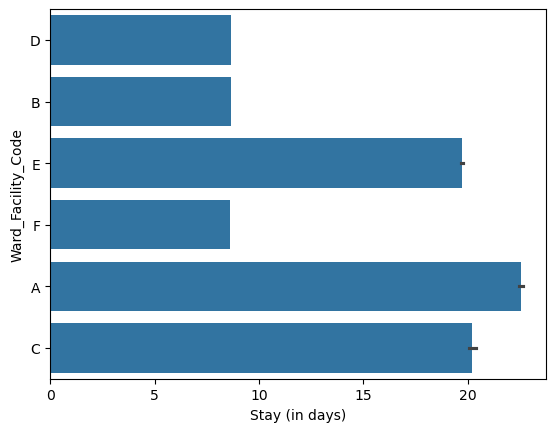

In [43]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)

plt.show()

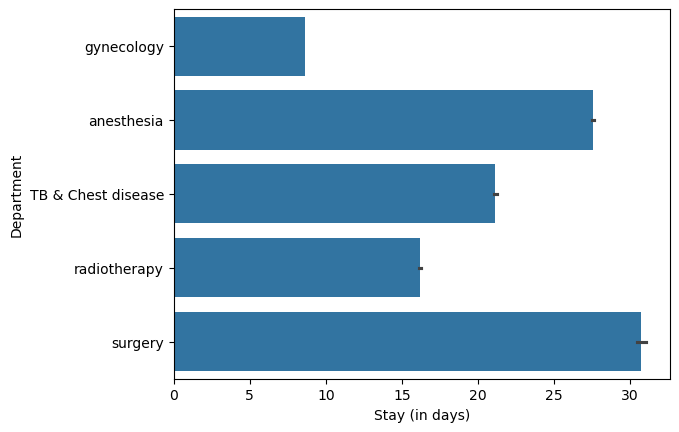

In [44]:
sns.barplot(y = 'Department', x = 'Stay (in days)', data = data)

plt.show()

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

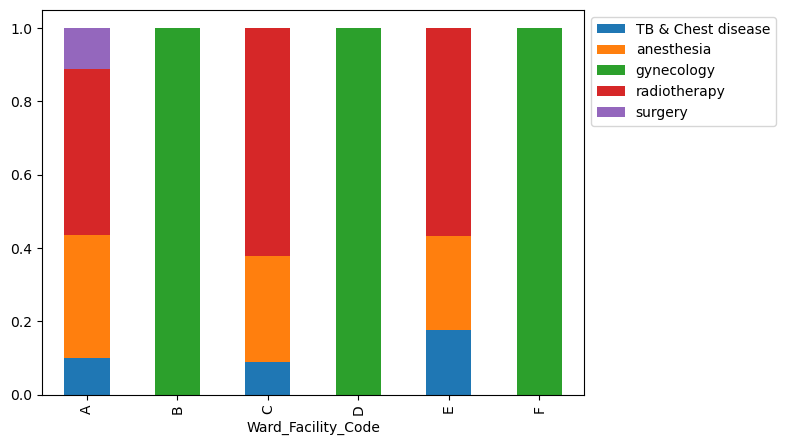

In [45]:
stacked_barplot(data, 'Ward_Facility_Code', 'Department')

plt.show()

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


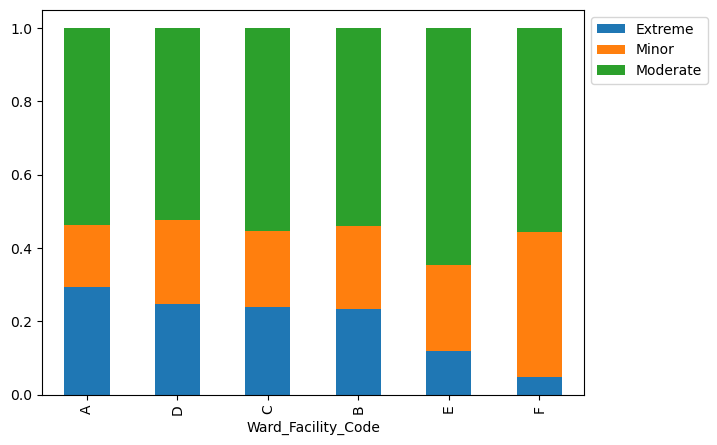

In [46]:
stacked_barplot(data, 'Ward_Facility_Code', 'Severity of Illness')

plt.show()

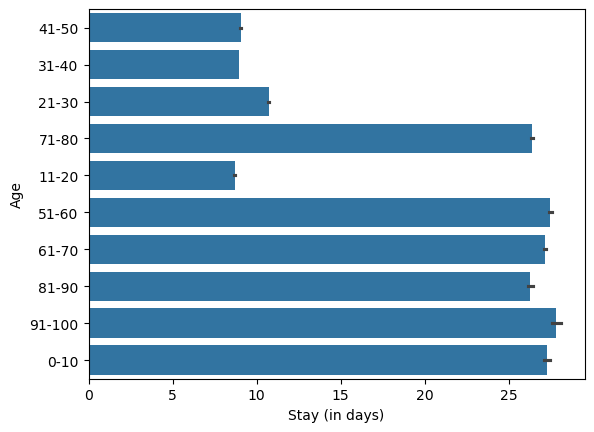

In [82]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data )

plt.show()

People aged 51-100 and 0-10 years have the longest length of stay in the hospital while those aged 21-50 years have the shortest length of stay. The 21-50 years
may be those admitted in the gynaecology ward.

### Data Preparation for Model Building
Since we have dealt with missing values, we will now encode categorical variables to prepare them for the ML models.
Separate dependent varaible from the independent variables
Split the data into training and test data, so that we can evaluate the model that we train on the testing data

In [137]:
# encode categorical variables, drop_first =True avoids redundant variables
data = pd.get_dummies(data, columns = data.select_dtypes(include = ['object', 'category']).columns.tolist(),
               drop_first =True)

# Convert boolean values to integers (0 and 1)
data = data.astype(int)

# Confirm the data types
print(data.dtypes)
        

Available Extra Rooms in Hospital        int32
staff_available                          int32
Visitors with Patient                    int32
Admission_Deposit                        int32
Stay (in days)                           int32
Department_anesthesia                    int32
Department_gynecology                    int32
Department_radiotherapy                  int32
Department_surgery                       int32
Ward_Facility_Code_B                     int32
Ward_Facility_Code_C                     int32
Ward_Facility_Code_D                     int32
Ward_Facility_Code_E                     int32
Ward_Facility_Code_F                     int32
doctor_name_Dr John                      int32
doctor_name_Dr Mark                      int32
doctor_name_Dr Nathan                    int32
doctor_name_Dr Olivia                    int32
doctor_name_Dr Sam                       int32
doctor_name_Dr Sarah                     int32
doctor_name_Dr Simon                     int32
doctor_name_D

In [139]:
# checking the data after handling categorical variables
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,health_conditions_unknown,Insurance_Yes
0,4,0,4,2966,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,2,10,2,5169,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
499996,13,8,2,4631,11,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
499997,2,3,2,5456,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
499998,2,1,2,4694,23,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [141]:
# droping Patientid as it will not add to the model
data = data.drop(columns = ['patientid'], axis = 1)

KeyError: "['patientid'] not found in axis"

In [146]:
# Separating the dependent and independent variables
X = data.drop(columns = ['Stay (in days)'], axis = 1)
y = data['Stay (in days)']

In [148]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
# Checking the shape of the train and the test data

print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

Shape of Training set :  (350000, 42)
Shape of test set :  (150000, 42)


In [152]:
import statsmodels.api as sm
# Add intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train OLS model
model = sm.OLS(y_train, X_train).fit()

# Make predictions
y_pred = model.predict(X_test)

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 4.926e+04
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:            -8.9700e+05
No. Observations:              350000   AIC:                         1.794e+06
Df Residuals:                  349961   BIC:                         1.794e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [160]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to compute Adjusted R-squared
def adjusted_r2_score(X, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]  # Number of observations
    k = X.shape[1] - 1  # Number of predictors (excluding intercept)
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2_score(X_test, y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Store results in a DataFrame for easy visualization
performance_metrics = pd.DataFrame({
    "R-squared": [r2],
    "Adjusted R-squared": [adj_r2],
    "RMSE": [rmse],
    "MAE": [mae],
    "MAPE (%)": [mape]
})

print(performance_metrics)

   R-squared  Adjusted R-squared      RMSE       MAE   MAPE (%)
0   0.843711            0.843667  3.131846  2.144731  19.575047


In [163]:
lin_reg_test = model_performance_regression(olsmodel, x_test, y_test)
lin_reg_test

NameError: name 'model_performance_regression' is not defined